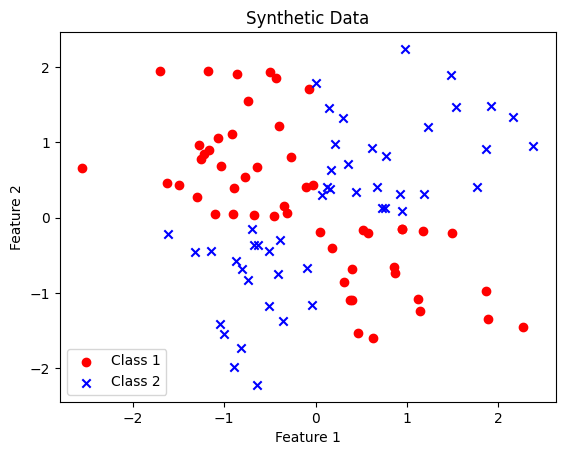

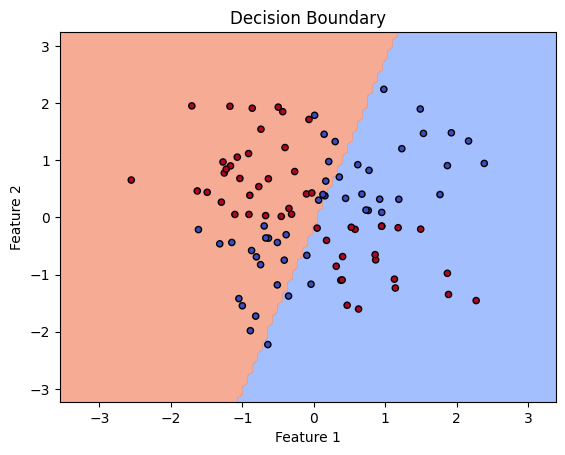

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generating synthetic data for two classes
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR function to create two classes

# Plotting the synthetic data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', marker='o', label='Class 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', marker='x', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data')
plt.legend()
plt.show()

# Training the SVM model with linear kernel
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plotting decision boundary of trained SVM model
plot_decision_boundary(svm_model, X, y)


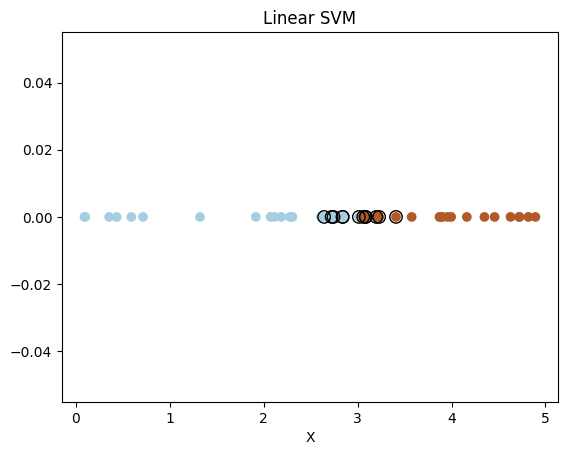

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate some random data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.array([0] * 20 + [1] * 20)

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[0]  # Since we're dealing with 1D data, only one coefficient exists
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[0]

# Plot the data and the hyperplane
plt.scatter(X[:, 0], np.zeros_like(X), c=y, cmap=plt.cm.Paired)
#plt.plot(xx, yy, 'k-')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], np.zeros_like(clf.support_vectors_[:, 0]),
            s=80, facecolors='none', edgecolors='k')
plt.xlabel('X')
plt.title('Linear SVM')
plt.show()


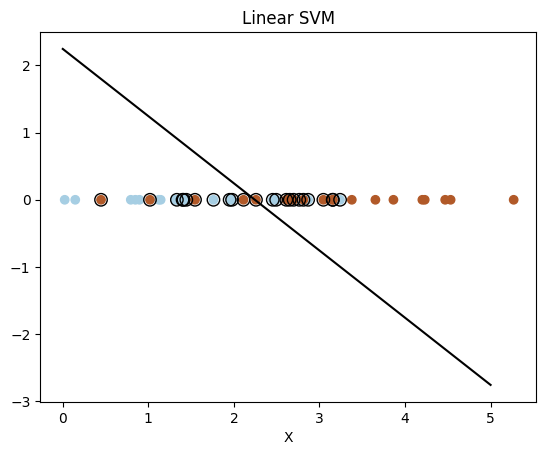

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate more separable random data
np.random.seed(0)
X = np.concatenate([np.random.normal(1, 1, 20), np.random.normal(3, 1, 20)]).reshape(-1, 1)
y = np.array([0] * 20 + [1] * 20)

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[0]  # Since we're dealing with 1D data, only one coefficient exists
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[0]

# Plot the data and the hyperplane
plt.scatter(X[:, 0], np.zeros_like(X), c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], np.zeros_like(clf.support_vectors_[:, 0]),
            s=80, facecolors='none', edgecolors='k')
plt.xlabel('X')
plt.title('Linear SVM')
plt.show()


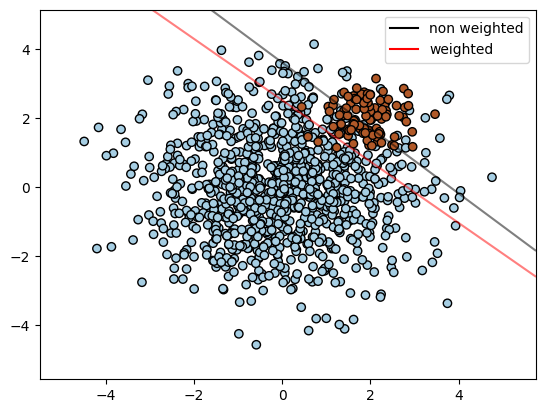

In [4]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight='balanced')
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

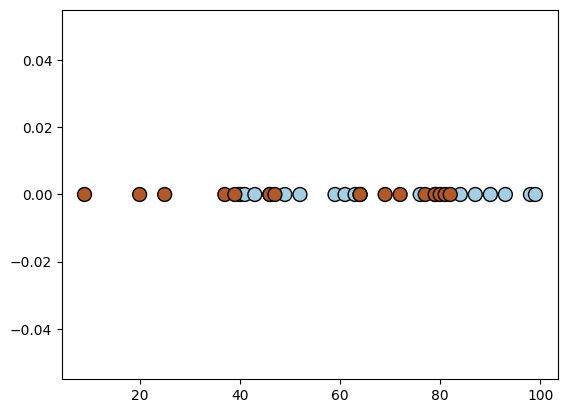

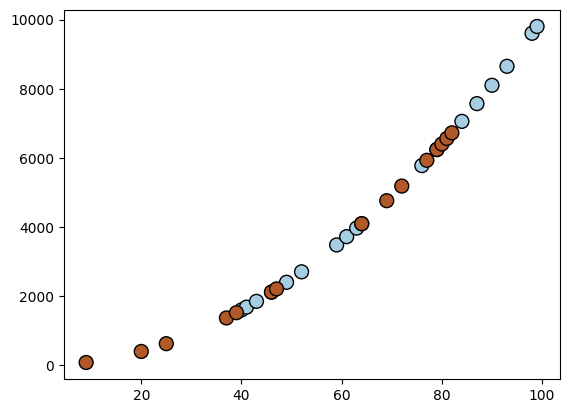

In [83]:
np.random.seed(0)
X1 = np.sort(np.unique(np.sort(np.random.randint(40, 100, 20))))
X2 = np.sort(np.unique(np.sort(np.random.randint(0, 85, 15))))

X = np.concatenate([X1, X2]).reshape(-1, 1)
y = np.array([0] * len(X1) + [1] * len(X2)).reshape(-1,1)

plt.scatter(X[:, 0], np.zeros_like(X), c = y, cmap=plt.cm.Paired, edgecolors="k", s = 100)
plt.show()

X_new = X**2
plt.scatter(X[:, 0], X**2, c = y, cmap=plt.cm.Paired, edgecolors="k", s = 100)
plt.show()

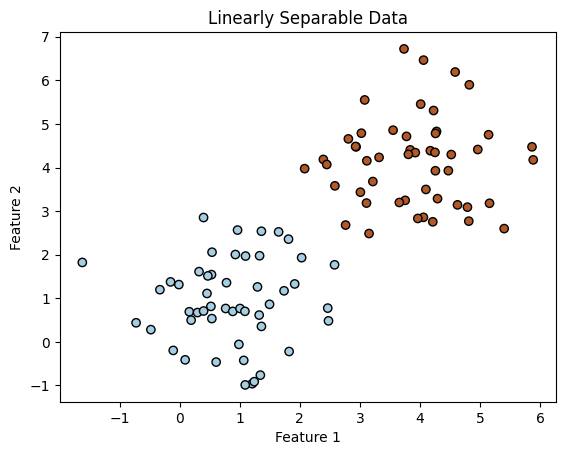

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Number of samples
n_samples = 100

# Generate linearly separable data
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[1, 1], [4, 4]], random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()


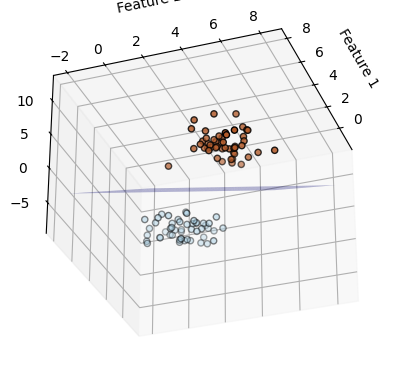

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Number of samples
n_samples = 100

# Generate linearly separable data with three features
X, y = make_blobs(n_samples=n_samples, n_features=3, centers=[[1, 1, 1], [5, 5, 5]], random_state=42)

# Fit SVM model to the data
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, edgecolors="k")

# Create a mesh grid to plot the separating plane
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
z = (-svm_model.intercept_[0] - svm_model.coef_[0][0] * xx - svm_model.coef_[0][1] * yy) / svm_model.coef_[0][2]

# Plot the separating plane with increased transparency and different color
ax.plot_surface(xx, yy, z, alpha=0.3, color='blue')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
#plt.title('Linearly Separable Data with Separating Plane')

ax.view_init(elev=-30, azim=20)
plt.show()


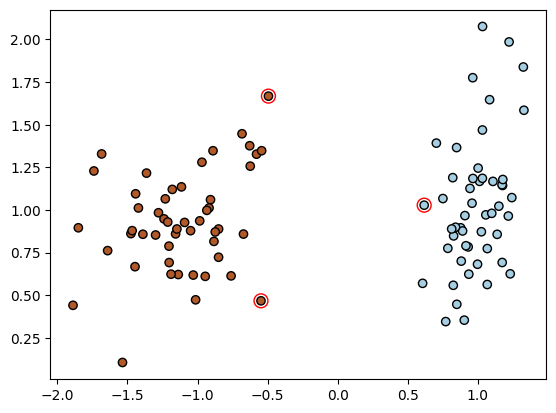

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=1)

# Train SVM classifier
svm_model = SVC(kernel='linear', C=10)
svm_model.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

# Plot misclassified points
y_pred = svm_model.predict(X)
misclassified = np.where(y != y_pred)[0]
plt.scatter(X[misclassified, 0], X[misclassified, 1], s=100, facecolors='none', edgecolors='b')

# Plot decision boundary and margin
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors, Misclassified Points, Margin, and Decision Boundary')

plt.show()


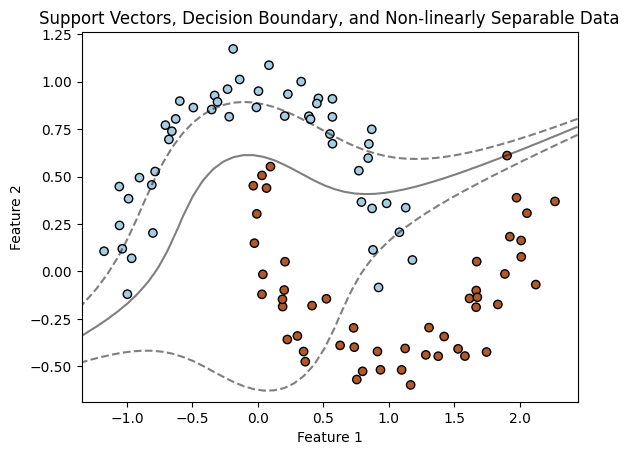

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate non-linearly separable data
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Train SVM classifier with polynomial kernel
svm_model = SVC(kernel='poly', degree=3)  # Polynomial kernel of degree 3
svm_model.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# Plot support vectors
#plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors, Decision Boundary, and Non-linearly Separable Data')

plt.show()


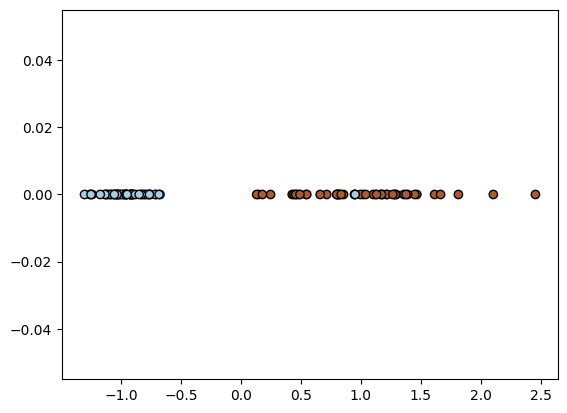

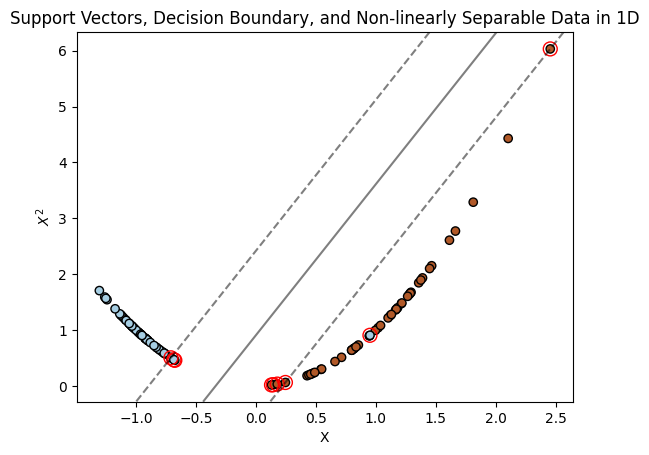

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate non-linearly separable data in 1D space
X_1d, y_1d  = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
#X_1d, y_1d = make_classification(n_samples=100, n_features=1, n_classes=2, n_clusters_per_class=1, random_state=2)

# Project data to 2D space by adding additional features
X_2d = np.hstack([X_1d, X_1d**2])  # Projecting to 2D space by squaring the feature

# Train linear SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_2d, y_1d)

plt.scatter(X_1d[:, 0], np.zeros_like(X_1d), c=y_1d, cmap=plt.cm.Paired, edgecolors="k")
plt.show()

# Plot data points in 2D space
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_1d, cmap=plt.cm.Paired, edgecolors="k")

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Set labels and title
plt.xlabel('X')
plt.ylabel('$X^2$')
plt.title('Support Vectors, Decision Boundary, and Non-linearly Separable Data in 1D')

plt.show()


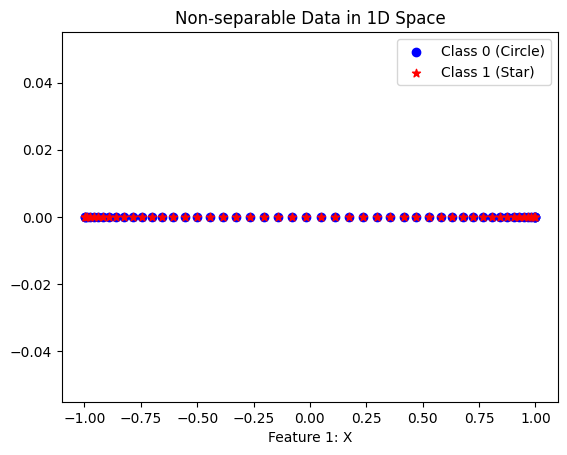

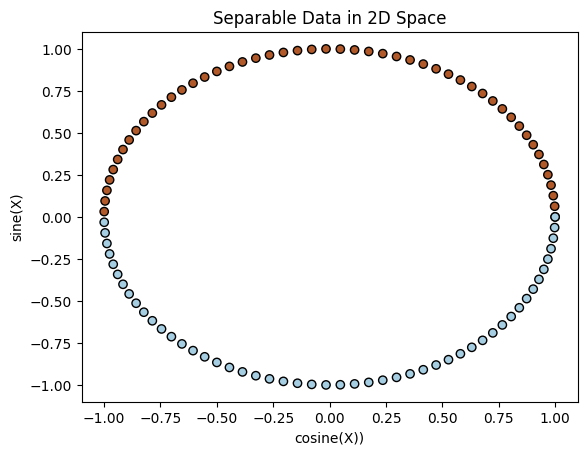

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Generate non-separable data in 1D space (points arranged in a circle)
np.random.seed(42)
theta = np.linspace(0, 2*np.pi, 100)

X_1d = np.cos(theta)
y_1d = np.sin(theta) > 0  # Assign labels based on whether sin(theta) > 0

# Plot the generated data in 1D space with different marker types for two classes
plt.scatter(X_1d[y_1d==0], np.zeros_like(X_1d[y_1d==0]), c='b', marker='o', label='Class 0 (Circle)')
plt.scatter(X_1d[y_1d==1], np.zeros_like(X_1d[y_1d==1]), c='r', marker='*', label='Class 1 (Star)')
plt.legend()
plt.xlabel('Feature 1: X')
plt.title('Non-separable Data in 1D Space')
plt.show()

# Project data to 2D space by adding an angle feature
X_2d = np.column_stack((X_1d, np.sin(theta)))

# Plot the projected data in 2D space
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_1d, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('cosine(X))')
plt.ylabel('sine(X)')
plt.title('Separable Data in 2D Space')
plt.show()

